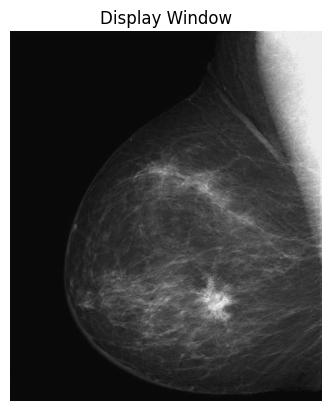

In [1]:
import cv2 as cv
import matplotlib.pyplot as plt
import sys
import numpy as np 

# Load the image
#img = cv.imread(cv.samples.findFile("Images/DIP3E_Original_Images_CH03/Fig0304(a)(breast_digital_Xray).tif"),  cv.IMREAD_GRAYSCALE).astype(np.float32)/255.0
img = cv.imread(cv.samples.findFile("./Images/DIP3E_Original_Images_CH03/Fig0304(a)(breast_digital_Xray).tif"),  cv.IMREAD_GRAYSCALE)
# Check if the image was loaded correctly
if img is None:
    sys.exit("Could not read the image.")

# Convert the image to RGB (OpenCV uses BGR by default)
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

# Display the image
plt.imshow(img, cmap= 'gray')
plt.title("Display Window")
plt.axis('off')  # Hide axes
plt.show()


In [2]:
dimensions = img.shape  # Returns a tuple of (rows, columns, channels)
print(dimensions)
mrow,mcol = img.shape
print(mrow,mcol)


(571, 482)
571 482


In [3]:
img
'''
for i in range(2):
    for j in range(3):
        print(f'({i},{j})')

    print(i)
''' 

"\nfor i in range(2):\n    for j in range(3):\n        print(f'({i},{j})')\n\n    print(i)\n"

In [4]:
print(f'I({200},{150}) = {img[200,150]}')

I(200,150) = 49


*EXAMPLE 2*

Se aplica la transformacion, de la S = T(r), solo convoluciona las muestras especificas, como 2 a 3 la ubicacion de pixeles. TRANSFORM

In [5]:
n,m = img.shape
out = np.zeros((n,m), dtype=np.float32)
for i in range(n):
    for j in range(m):
       # print(f'I({i},{j}) = {img[i,j]}')
        out[i,j] = img[i,j]
        #print(f'I({i},{j}) = {img[i,j]}')

Text(0.5, 1.0, 'Input image')

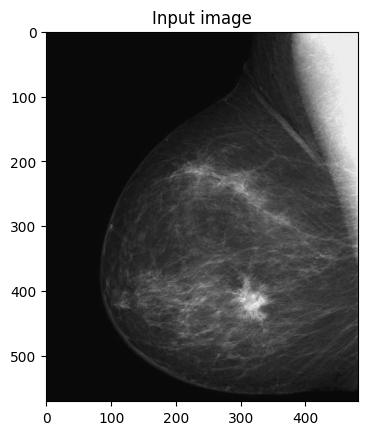

In [6]:
plt.imshow(img,'gray')
plt.title("Input image")


Text(0.5, 1.0, 'output image')

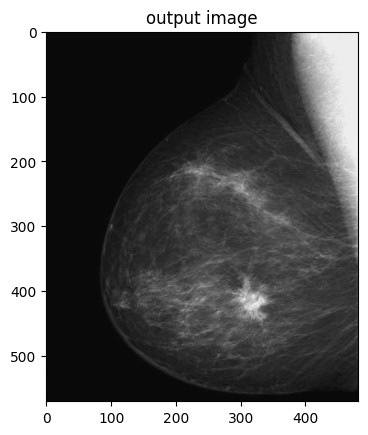

In [7]:
plt.imshow(out, 'gray')
plt.title("output image")

Este codigo en cambio es para la  valoracion en negativo, *NEGATIVE TRANSFORM*

In [8]:
n,m = img.shape
out1 = np.zeros((n,m), dtype=np.uint8)
for i in range(n):
    for j in range(m):
        out1[i,j] = 255-img[i,j]

Text(0.5, 1.0, 'output image')

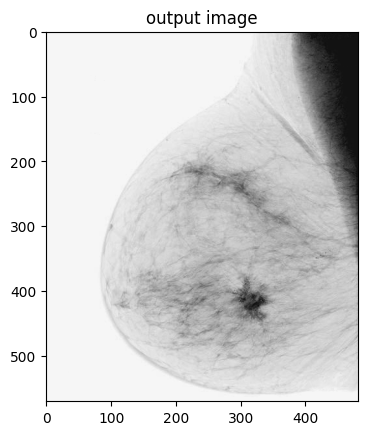

In [9]:
plt.imshow(out1, 'gray')
plt.title("output image")

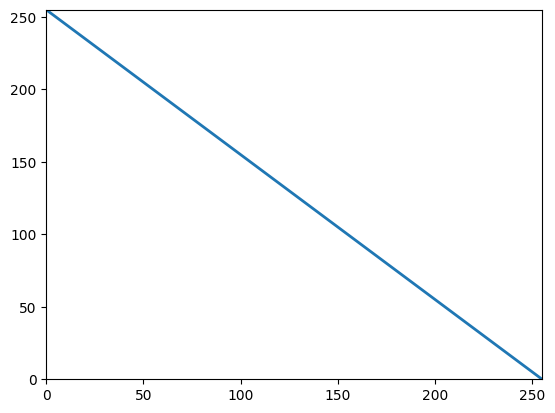

In [10]:
r = np.linspace(0, 255, 256)
s = 255 - r
fig, ax = plt.subplots()

ax.plot(r, s, linewidth=2.0)

ax.set(xlim=(0, 255), xticks=np.arange(0, 256, 50), 
       ylim=(0, 255), yticks=np.arange(0, 256, 50))

# Show the plot
plt.show()

Tranformacion de pontencia, gamma. pag127. Reproducir 3.6

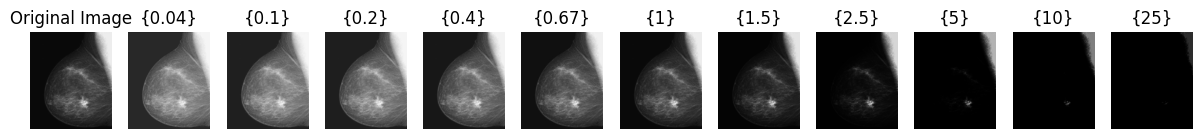

In [11]:
# Function to apply gamma correction
def gamma_correction(image, gamma):
    normalized_img = image / 255.0
    gamma_corrected = np.power(normalized_img, gamma)
    gamma_corrected = np.uint8(gamma_corrected * 255)
    
    return gamma_corrected

gamma_values = [0.04,0.1,0.2,0.4,0.67,1,1.5,2.5,5,10,25]

# Apply gamma correction for each gamma value
fig, axs = plt.subplots(1, len(gamma_values) + 1, figsize=(15, 5))

# Original image
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')
axs[0].axis('off')

# Gamma images
for i, gamma in enumerate(gamma_values):
    gamma_corrected_img = gamma_correction(img, gamma)
    axs[i + 1].imshow(gamma_corrected_img, cmap='gray')
    axs[i + 1].set_title( {gamma})
    axs[i + 1].axis('off')

plt.show()

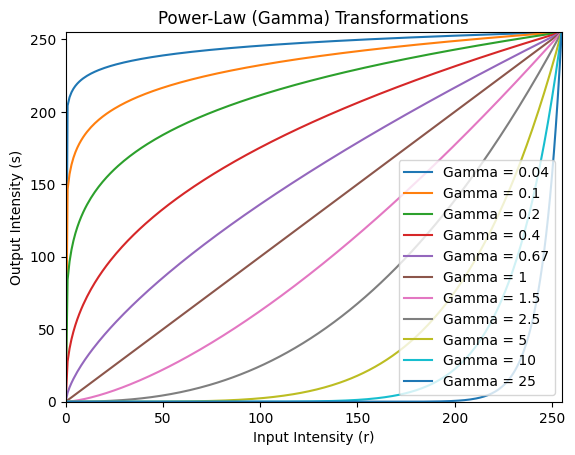

In [12]:
# Input intensity values
r = np.linspace(0, 255, 256)

def gamma_transformation(r, gamma):
    return 255 * np.power(r / 255.0, gamma)


fig, ax = plt.subplots()

# Plot gamma transformations for each gamma value
for gamma in gamma_values:
    s = gamma_transformation(r, gamma)
    ax.plot(r, s, label=f'Gamma = {gamma}')

# Set plot limits and ticks
ax.set(xlim=(0, 255), xticks=np.arange(0, 256, 50), 
       ylim=(0, 255), yticks=np.arange(0, 256, 50))

ax.set_xlabel('Input Intensity (r)')
ax.set_ylabel('Output Intensity (s)')
ax.set_title('Power-Law (Gamma) Transformations')
ax.legend()
plt.show()